In [1]:
# Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# for easier reading np
np.set_printoptions(precision=3,suppress=True)

In [8]:
with open('../../Datasets/normalized_heart_slimmed.csv') as f:
    temp = np.loadtxt(f, delimiter=',', skiprows=1)
X = temp[:,:-1]
y = temp[:,-1]
from sklearn.preprocessing import OneHotEncoder
drop_enc = OneHotEncoder()
y = drop_enc.fit_transform(y.reshape(-1, 1)).toarray()

feats_train, feats_test, Y_train, Y_test = train_test_split(X, y,test_size=0.3,random_state=42)


In [9]:
feats_train.shape,Y_train.shape

((212, 9), (212, 2))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 15)                150       
                                                                 
 dense_5 (Dense)             (None, 24)                384       
                                                                 
 dense_6 (Dense)             (None, 15)                375       
                                                                 
 dense_7 (Dense)             (None, 2)                 32        
                                                                 
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________
None


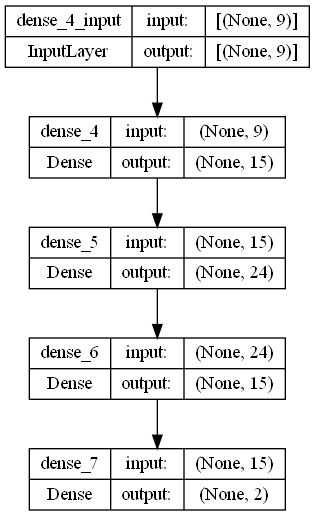

In [10]:
# Create the model
model = Sequential()
model.add(Dense(15, input_dim = 9, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(2, activation='softmax'))
print(model.summary())
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(feats_train, Y_train, epochs=200, batch_size=40, verbose=1)

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7141 - accuracy: 0.5330
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5566
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.5566
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.5519
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6451 - accuracy: 0.5613
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 0.6316 - accuracy: 0.5566
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 0.6189 - accuracy: 0.5896
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6054 - accuracy: 0.6509
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.6745
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.7406
Epoch 11/200
6/6 [===========

In [12]:
test_results = model.evaluate(feats_test,Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

3/3 [==============================] - 0s 3ms/step - loss: 0.4754 - accuracy: 0.8352
Test results - Loss: 0.47536954283714294 - Accuracy: 0.8351648449897766%


3/3 [==============================] - 0s 2ms/step
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


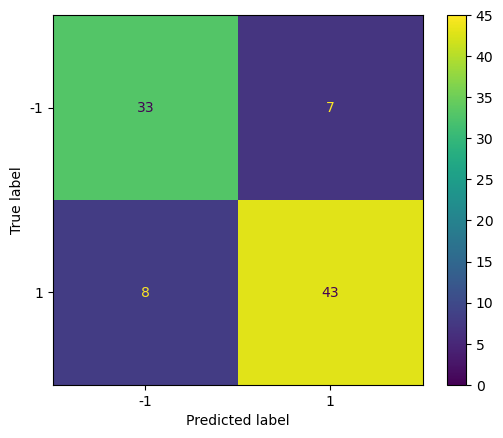

In [17]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

import matplotlib.pyplot as plt

predictions_test = model.predict(feats_test)

binary_predictions_test = []
binay_y_test = []
print(Y_test)
for item in predictions_test:
    binary_predictions_test.append(int(item[0]<item[1]))
    binay_y_test.append(int(item[0]<item[1]))


cm = confusion_matrix(binay_y_test, Y_test[:, 1], labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[-1,1])
disp.plot()
disp.im_.set_clim(0, 45)
plt.show()